Future of Employment
---

Reproduction of the Future of Employment analysis from Frey and Osborne 2013 (Elsevier paper)

By Paul Duckworth



In [210]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default')

datasets = '/home/paul/Datasets/ONET/'

In [305]:
#Load labels 
filename_y = 'FoWork/frey_osborne_data.xlsx'

y_df = pd.ExcelFile(os.path.join(datasets, filename)).parse("Sheet1")  # sheet 2 has the extra intern's work
# y_df.info()

yes = y_df[y_df['Training set automatable labels']==1]
no = y_df[y_df['Training set automatable labels']==1]
y_df['Training set automatable labels'].value_counts()

# y_df[['Training set automatable labels']].hist()

1.0    37
0.0    33
Name: Training set automatable labels, dtype: int64

In [184]:
a = df['Probability of Computerisation'] > 0.01 
b = df['Category Label'] > 2

df[a&b].head()


,BLS codes,Occupation Name,Probability of Computerisation,Category Label,Training set automatable labels
76,25-2053,Special Education Teachers Middle School,0.016477,3,NaN
54,29-1051,Pharmacists,0.011528,4,NaN
74,41-3031,Securities Commodities and Financial Services ...,0.015762,6,NaN
85,29-1199,Health Diagnosing and Treating Practitioners A...,0.020303,4,NaN
58,27-2022,Coaches and Scouts,0.013270,3,NaN


In [191]:
##  Check a variable is all numeric, or alpha:
y_df['Training set automatable labels'].unique()

# print y_df.test.int.isdigit()


## Text Variable contains a word:
# name = y_df['Occupation Name']
# is_health = name.str.contains('Health')
# y_df[is_health]



array([ nan,   0.,   1.])

In [214]:
## Load ONET DATA - X \in R^9
filename_skills = 'databases/db2010/Skills.txt' 
sk = pd.read_table(os.path.join(datasets,onet_skills), sep='\t')
sk[:20]


,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,2.A.1.a,Reading Comprehension,IM,4.38,8,0.18,4.02,4.73,N,n/a,06/2010,Analyst
1,11-1011.00,2.A.1.a,Reading Comprehension,LV,4.75,8,0.25,4.26,5.24,N,N,06/2010,Analyst
2,11-1011.00,2.A.1.b,Active Listening,IM,4.38,8,0.18,4.02,4.73,N,n/a,06/2010,Analyst
3,11-1011.00,2.A.1.b,Active Listening,LV,4.88,8,0.35,4.19,5.56,N,N,06/2010,Analyst
4,11-1011.00,2.A.1.c,Writing,IM,4.12,8,0.23,3.68,4.57,N,n/a,06/2010,Analyst
5,11-1011.00,2.A.1.c,Writing,LV,4.50,8,0.19,4.13,4.87,N,N,06/2010,Analyst
6,11-1011.00,2.A.1.d,Speaking,IM,4.38,8,0.18,4.02,4.73,N,n/a,06/2010,Analyst
7,11-1011.00,2.A.1.d,Speaking,LV,4.88,8,0.13,4.63,5.12,N,N,06/2010,Analyst
8,11-1011.00,2.A.1.e,Mathematics,IM,3.00,8,0.19,2.63,3.37,N,n/a,06/2010,Analyst
9,11-1011.00,2.A.1.e,Mathematics,LV,3.38,8,0.46,2.47,4.28,N,N,06/2010,Analyst


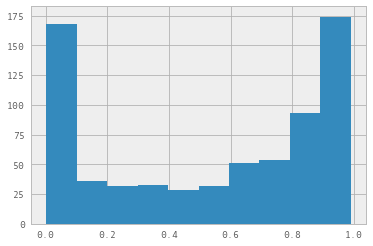

In [186]:
y_df['Probability of Computerisation'].hist() # (figsize=(15, 10))


Let's take a look at the Task Statements: 
---

We can match Task Statements to Occupations using hte ONET-SOC Code. i.e.